<h1>Bayesian truth finder</h1>

<div><font size="4">
    <b>Objects:</b> 
    <ul>
        <li>The universes contain 100 objects.</li>
        <li>We have 20 periodical observations at t0 , . . . , t19</li>
        <li>The universes contain 10 independent sources.</li>
    </ul>
</font></div>

<h3>Case 1:</h3>
<div><font size="4">
    <ul>
        <li>Each object contains 2-3 transitions</li>
        <li>In the universe an object exists at t0 with probability p_s = 0.7 and at other points with probability p_o = 0.1 </li>
    </ul>
</font></div>

<h3>Case 2:</h3>
<div><font size="4">
    <ul>
        <li>Each object contains 1-6 transitions</li>
        <li>In the universe an object exists at t0 with probability p_s = 0.7, at t19 with probability p_e = 0.5, and at other points with probability p_o = 0.2 </li>
    </ul>
</font></div>

<dev><font size="4">Values of inintial parameters for data generetion, namly <b>p_t mean</b> and <b>f0 mean</b> are in the range of [0, 1.0]. These values are randomized by Gaussian distribution with std = 0.1. The bayesian algorithm ran 10 times for each settings. The average measures are reported below.</font></dev>

In [56]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

%matplotlib inline

In [57]:
print 'Python version ' + sys.version
print 'Pandas version ' + pd.__version__

Python version 2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2]
Pandas version 0.17.1


In [58]:
st = pd.read_csv('statistics_data.csv')
st2 = pd.read_csv('statistics_data2.csv')
st_mean = pd.DataFrame(columns=['p_t mean', 'f0 mean', 'edit dist', 'edit std', 'edit dist mv', 'edit std mv',
                                'cov delta', 'cov std', 'exac delta', 'exac std'])
st_mean2 = pd.DataFrame(columns=['p_t mean', 'f0 mean', 'edit dist', 'edit std', 'edit dist mv', 'edit std mv',
                                'cov delta', 'cov std', 'exac delta', 'exac std'])
val_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for p_t in val_list:
    for f0 in val_list:
        st_mean = st_mean.append(np.mean(st[(st['p_t mean']==p_t) & (st['f0 mean']==f0)]), ignore_index=True)
        st_mean2 = st_mean2.append(np.mean(st2[(st2['p_t mean']==p_t) & (st2['f0 mean']==f0)]), ignore_index=True)

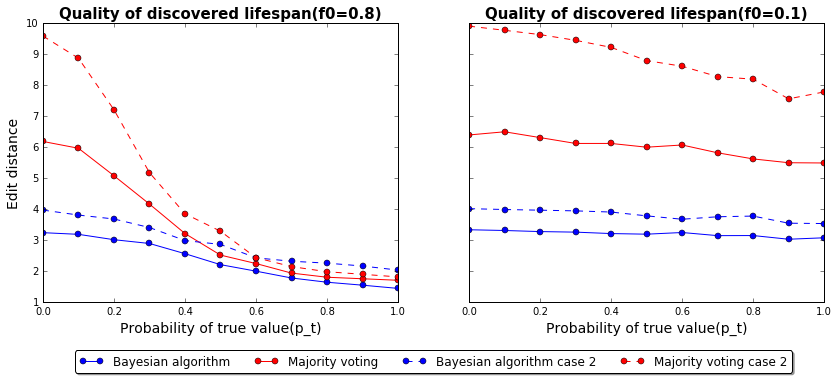

In [59]:
val_array = st_mean['f0 mean'].unique()
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(14, 5)
axarr[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['edit dist']), 'bo-', label='Bayesian algorithm')
axarr[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['edit dist mv']), 'ro-', label='Majority voting')
axarr[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['edit dist']), 'bo--', label='Bayesian algorithm case 2')
axarr[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['edit dist mv']), 'ro--', label='Majority voting case 2')
axarr[0].set_title('Quality of discovered lifespan(f0={})'.format(val_array[8]), fontsize=15, fontweight='bold')
axarr[0].set_xlabel('Probability of true value(p_t)', fontsize=14)
axarr[0].set_ylabel('Edit distance', fontsize=14)
axarr[0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
          fancybox=True, shadow=True, ncol=5)

axarr[1].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['edit dist']), 'bo-',
             val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['edit dist mv']), 'ro-')
axarr[1].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['edit dist']), 'bo--',
             val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['edit dist mv']), 'ro--')
axarr[1].set_title('Quality of discovered lifespan(f0={})'.format(val_array[1]), fontsize=15, fontweight='bold')
axarr[1].set_xlabel('Probability of true value(p_t)', fontsize=14)

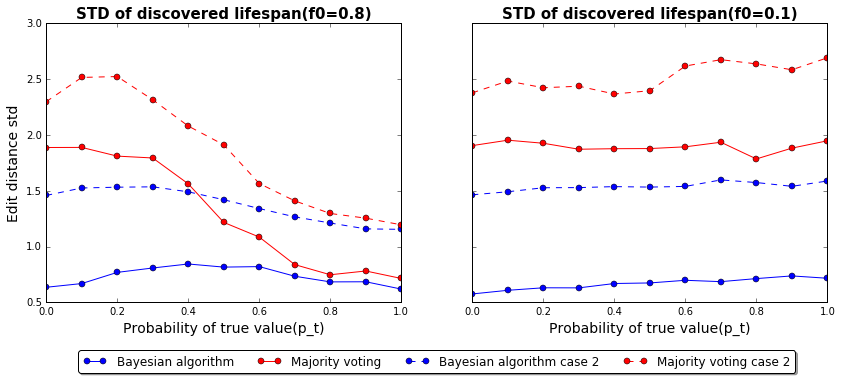

In [60]:
f2, axarr2 = plt.subplots(1, 2, sharey=True)
f2.set_size_inches(14, 5)
axarr2[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['edit std']), 'bo-', label='Bayesian algorithm')
axarr2[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['edit std mv']), 'ro-', label='Majority voting')
axarr2[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['edit std']), 'bo--', label='Bayesian algorithm case 2')
axarr2[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['edit std mv']), 'ro--', label='Majority voting case 2')
axarr2[0].set_title('STD of discovered lifespan(f0={})'.format(val_array[8]), fontsize=15, fontweight='bold')
axarr2[0].set_xlabel('Probability of true value(p_t)', fontsize=14)
axarr2[0].set_ylabel('Edit distance std', fontsize=14)
axarr2[0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
          fancybox=True, shadow=True, ncol=5)

axarr2[1].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['edit std']), 'bo-',
             val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['edit std mv']), 'ro-')
axarr2[1].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['edit std']), 'bo--',
             val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['edit std mv']), 'ro--')
axarr2[1].set_title('STD of discovered lifespan(f0={})'.format(val_array[1]), fontsize=15, fontweight='bold')
axarr2[1].set_xlabel('Probability of true value(p_t)', fontsize=14)

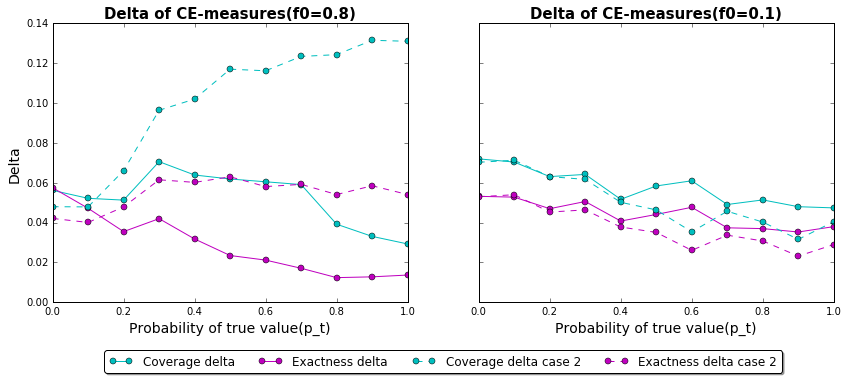

In [61]:
f3, axarr3 = plt.subplots(1, 2, sharey=True)
f3.set_size_inches(14, 5)
axarr3[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['cov delta']), 'co-', label='Coverage delta')
axarr3[0].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[8]]['exac delta']), 'mo-', label='Exactness delta')
axarr3[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['cov delta']), 'co--', label='Coverage delta case 2')
axarr3[0].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[8]]['exac delta']), 'mo--', label='Exactness delta case 2')
axarr3[0].set_title('Delta of CE-measures(f0={})'.format(val_array[8]), fontsize=15, fontweight='bold')
axarr3[0].set_xlabel('Probability of true value(p_t)', fontsize=14)
axarr3[0].set_ylabel('Delta', fontsize=14)
axarr3[0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
          fancybox=True, shadow=True, ncol=5)

axarr3[1].plot(val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['cov std']), 'co-',
             val_array, list(st_mean[st_mean['f0 mean']==val_array[1]]['exac std']), 'mo-')
axarr3[1].plot(val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['cov std']), 'co--',
             val_array, list(st_mean2[st_mean2['f0 mean']==val_array[1]]['exac std']), 'mo--')
axarr3[1].set_title('Delta of CE-measures(f0={})'.format(val_array[1]), fontsize=15, fontweight='bold')
axarr3[1].set_xlabel('Probability of true value(p_t)', fontsize=14)

Table. Case 1

In [48]:
st_mean[st_mean['f0 mean'].isin([val_array[1], val_array[8]])].sort_values(['f0 mean', 'p_t mean'])

,p_t mean,f0 mean,edit dist,edit std,edit dist mv,edit std mv,cov delta,cov std,exac delta,exac std
1,0.0,0.1,3.342,0.5753,6.400,1.9046,0.0674,0.0720,0.0707,0.0532
12,0.1,0.1,3.318,0.6079,6.502,1.9530,0.0657,0.0704,0.0688,0.0528
23,0.2,0.1,3.283,0.6305,6.315,1.9256,0.0569,0.0631,0.0622,0.0470
34,0.3,0.1,3.265,0.6298,6.126,1.8720,0.0521,0.0642,0.0525,0.0506
45,0.4,0.1,3.219,0.6688,6.126,1.8768,0.0472,0.0517,0.0471,0.0408
56,0.5,0.1,3.199,0.6739,6.005,1.8781,0.0478,0.0584,0.0463,0.0441
67,0.6,0.1,3.253,0.6977,6.076,1.8937,0.0491,0.0610,0.0468,0.0477
78,0.7,0.1,3.152,0.6855,5.824,1.9347,0.0470,0.0491,0.0426,0.0374
89,0.8,0.1,3.155,0.7129,5.627,1.7851,0.0477,0.0514,0.0424,0.0370
100,0.9,0.1,3.036,0.7369,5.504,1.8819,0.0463,0.0480,0.0373,0.0353


Table. Case 2

In [51]:
st_mean2[st_mean2['f0 mean'].isin([val_array[1], val_array[8]])].sort_values(['f0 mean', 'p_t mean'])

,p_t mean,f0 mean,edit dist,edit std,edit dist mv,edit std mv,cov delta,cov std,exac delta,exac std
1,0.0,0.1,4.022,1.4638,9.910,2.3776,0.0487,0.0703,0.0442,0.0530
12,0.1,0.1,3.995,1.4909,9.776,2.4833,0.0437,0.0713,0.0354,0.0540
23,0.2,0.1,3.973,1.5270,9.637,2.4230,0.0481,0.0631,0.0435,0.0453
34,0.3,0.1,3.951,1.5283,9.452,2.4368,0.0502,0.0617,0.0437,0.0464
45,0.4,0.1,3.913,1.5371,9.225,2.3669,0.0511,0.0502,0.0436,0.0378
56,0.5,0.1,3.790,1.5328,8.799,2.3964,0.0459,0.0464,0.0374,0.0351
67,0.6,0.1,3.681,1.5389,8.616,2.6175,0.0442,0.0354,0.0363,0.0261
78,0.7,0.1,3.761,1.5970,8.282,2.6745,0.0523,0.0457,0.0412,0.0337
89,0.8,0.1,3.783,1.5735,8.199,2.6368,0.0518,0.0403,0.0390,0.0308
100,0.9,0.1,3.553,1.5397,7.565,2.5841,0.0470,0.0316,0.0332,0.0232
